In [1]:
import tensorflow as tf
import numpy as np
import collections

In [2]:
wait_list=np.array([[100.0, 16.0], [92.0, 16.2], [104.8, 16.24], [110.0, 17.2], [109.7, 16.24], [108.0, 17.25], [100.0, 16.0], [86.48, 14.24], [89.9, 15.0], [102.0, 16.24], [104.98, 16.23], [99.9, 16.24], [129.98, 16.23], [129.9, 16.24], [86.8, 16.2], [100.02, 17.63], [99.8, 16.24], [86.8, 14.83], [82.0, 14.03], [92.0, 14.83], [98.8, 16.2], [93.82, 16.2], [86.8, 16.23], [87.0, 14.83], [100.0, 17.23], [109.9, 17.24], [108.0, 17.25], [89.8, 14.8], [89.8, 16.04], [110.0, 19.25], [100.0, 16.0], [99.8, 16.23], [111.0, 18.0], [129.92, 16.24], [110.0, 19.25], [130.0, 16.0], [130.0, 16.0], [130.0, 16.0], [80.0, 13.63], [129.98, 16.26], [105.0, 16.0], [104.98, 16.23], [91.0, 15.0], [86.8, 16.23], [129.98, 16.23], [56.8, 10.0], [108.0, 17.25], [110.0, 16.0], [105.0, 16.23], [100.0, 17.23], [95.0, 16.23], [110.0, 19.2], [99.8, 16.05], [129.9, 16.25], [99.8, 16.05], [79.6, 13.63], [100.0, 16.0], [130.0, 16.0], [130.0, 16.0], [108.0, 17.0], [80.0, 14.0], [86.8, 15.04], [99.8, 16.25], [61.0, 14.0], [86.86, 13.64], [99.8, 16.21], [76.7, 12.0], [110.0, 19.25], [92.0, 16.24], [92.0, 16.24], [99.8, 16.25], [90.0, 16.2], [99.8, 16.25], [106.0, 17.25], [92.0, 14.84], [99.8, 16.25], [91.3, 14.8], [92.0, 16.2], [99.8, 16.25], [105.0, 17.24], [95.0, 16.2], [105.0, 16.23], [92.0, 16.23], [110.0, 19.25], [105.0, 17.2], [79.6, 13.6], [110.0, 19.2], [79.6, 13.62], [108.0, 17.2], [65.5, 10.83], [87.0, 14.83], [68.0, 11.15], [92.0, 14.83], [98.9, 16.28], [78.0, 13.6], [92.0, 14.85], [110.0, 19.26], [86.48, 14.24], [110.0, 19.0], [88.0, 14.0], [105.0, 16.0], [79.8, 13.6], [129.97, 16.2], [130.0, 16.0], [109.8, 19.25], [90.0, 15.0], [99.8, 16.23], [105.0, 16.0], [108.0, 17.25], [107.0, 17.24], [78.0, 13.64], [110.0, 17.2], [107.0, 17.24], [99.6, 16.24], [112.0, 17.2], [110.0, 16.0], [104.81, 16.23], [85.28, 14.23], [80.0, 13.63], [80.0, 13.63], [105.0, 16.0], [104.81, 16.23], [99.6, 16.2], [105.0, 17.2], [99.8, 16.24], [110.0, 19.25], [78.0, 14.0], [99.6, 16.23], [89.8, 14.84], [110.0, 19.2], [129.97, 16.24], [129.97, 16.2], [110.0, 19.25], [57.6, 11.9], [80.0, 14.0], [87.0, 14.83], [100.2, 17.23], [86.48, 14.24], [110.0, 19.25], [65.5, 10.83], [79.6, 13.63], [80.0, 13.0], [85.32, 14.16], [79.58, 13.8], [90.45, 14.83], [106.0, 17.25], [106.0, 17.25], [109.88, 19.25], [104.9, 16.23], [84.9, 14.03], [90.8, 14.84], [90.8, 14.84], [82.0, 14.24], [92.0, 16.24], [92.0, 14.8], [110.0, 19.28], [79.6, 13.63], [104.88, 16.23], [107.0, 14.0], [99.8, 16.3], [80.0, 13.22], [79.78, 13.22], [87.0, 13.6], [87.0, 13.62], [87.0, 14.83], [87.0, 14.8], [109.42, 17.2], [79.0, 13.0], [105.0, 16.0], [110.0, 19.26], [110.0, 19.24], [110.0, 19.2], [110.0, 19.2], [82.3, 14.32], [87.8, 14.82], [104.8, 16.23], [105.0, 16.25], [99.8, 16.25], [88.0, 16.23], [105.0, 16.25], [86.0, 14.0], [86.8, 14.04], [104.88, 16.24], [80.0, 14.0], [92.0, 14.83], [64.9, 11.5], [99.8, 16.25], [100.0, 16.0], [86.8, 14.24], [86.0, 14.0], [78.0, 13.63], [82.0, 14.0], [87.0, 14.0], [88.0, 14.0], [108.8, 17.25], [130.0, 16.0], [86.0, 15.0], [106.8, 16.25], [105.0, 16.24], [106.0, 17.28], [106.0, 17.25], [99.8, 16.25], [90.8, 14.84], [110.0, 19.2], [110.0, 19.2], [86.8, 16.3], [79.6, 13.6], [79.6, 13.6], [79.6, 13.62], [79.6, 13.6], [92.0, 16.23], [99.8, 16.24], [105.0, 16.24], [105.0, 16.2], [79.6, 13.6], [79.6, 13.6], [99.0, 16.0], [79.0, 13.0], [110.0, 17.0], [105.0, 17.0], [92.0, 16.0], [92.0, 16.0], [110.0, 17.0], [110.0, 17.0], [80.0, 14.0], [89.0, 15.0], [105.02, 16.23], [92.0, 14.84], [88.0, 14.0], [100.0, 17.23], [100.0, 17.2], [100.0, 17.23], [100.0, 17.23], [75.7, 13.12], [74.3, 13.64], [87.0, 14.0], [85.0, 14.03], [82.0, 14.04], [107.0, 17.24], [110.0, 17.0], [90.0, 15.0], [105.0, 17.2], [104.81, 16.23], [129.98, 16.26], [129.98, 16.26], [84.0, 14.0], [92.0, 14.8], [99.6, 16.7], [104.98, 16.24], [110.0, 19.2], [92.0, 16.2], [99.8, 16.2], [87.0, 15.0], [79.6, 13.63], [83.0, 14.0]])
wait_list=tf.Variable(wait_list[:15])
# wait_list=tf.reshape(wait_list,(3,5,2))

In [3]:
aa=np.random.randint(0,10,(5,3,2))

In [4]:
aa

array([[[3, 4],
        [8, 3],
        [9, 0]],

       [[6, 6],
        [7, 2],
        [2, 2]],

       [[1, 1],
        [0, 8],
        [5, 0]],

       [[9, 0],
        [9, 6],
        [4, 0]],

       [[5, 0],
        [6, 7],
        [1, 6]]])

In [5]:
aa[:,1:2,:]=[1,2]

In [6]:
tf.cast(aa,tf.float32)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[3., 4.],
        [1., 2.],
        [9., 0.]],

       [[6., 6.],
        [1., 2.],
        [2., 2.]],

       [[1., 1.],
        [1., 2.],
        [5., 0.]],

       [[9., 0.],
        [1., 2.],
        [4., 0.]],

       [[5., 0.],
        [1., 2.],
        [1., 6.]]], dtype=float32)>

In [7]:
a1=[[0,1],[0,0]]
a2=[[1,0],[0,1]]

In [8]:
#实数直接取最大值，也可以转为bool，用或运算
#取最小值，相当于bool交运算
tf.maximum(a1,a2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [0, 1]])>

In [9]:
a3=tf.cast(a1,tf.bool) | tf.cast(a2,tf.bool)

In [10]:
tf.cast(a3,tf.float32)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [0., 1.]], dtype=float32)>

In [11]:
wait_list

<tf.Variable 'Variable:0' shape=(15, 2) dtype=float64, numpy=
array([[100.  ,  16.  ],
       [ 92.  ,  16.2 ],
       [104.8 ,  16.24],
       [110.  ,  17.2 ],
       [109.7 ,  16.24],
       [108.  ,  17.25],
       [100.  ,  16.  ],
       [ 86.48,  14.24],
       [ 89.9 ,  15.  ],
       [102.  ,  16.24],
       [104.98,  16.23],
       [ 99.9 ,  16.24],
       [129.98,  16.23],
       [129.9 ,  16.24],
       [ 86.8 ,  16.2 ]])>

In [12]:
#模拟3个batch ,每个batch序列长度为5（即有5艘船），每艘船维度为2（长宽）
wait_list=tf.reshape(wait_list,(3,5,2))

In [13]:
#改成数据结构为：batch,seq_len(可排点个数)，2（坐标）
#假设最多6个可排点，初始化值全是（0,0）,然后配合mask值来使用
available_point=tf.zeros((3,6,2))

In [14]:
b_size=wait_list.shape[0]

In [15]:
boat_state={i:[]  for i in range(b_size)}

In [16]:
boat_state

{0: [], 1: [], 2: []}

In [17]:


#判断能否放下该船
def judge_put(xi,yi,li,wi,L,W):
    if (xi+li<=L) and (yi+wi)<=W:
        return True
    else:
        return False
#判断船之间不重叠：
def judge_overlab(xi,yi,li,wi,xj,yj,lj,wj):
    if (xi+li<=xj) or (xj+lj<=xi) or (yi+wi<=yj) or (yj+wj<=yi):
        return True
    else:
        return False


##在外面通过可排点队列，判断闸室是否已满    
#大概逻辑：传入该闸室的可排点队列，闸室状态，当前排闸的船舶信息


def quick_sort_brake(each_boat,available_queue,brake_boat,L,W):
    # 可排序点队列
#     available_queue = [(0, 0)]

#     brake_boat = {}  # 船的序号，长，宽，在闸室中的坐标
#     for index,each_boat in enumerate(wait_list):
    if True:
        '''
        先试第一个可排点，再试第二个可排点，能放下（满足约束）就放，否则就放弃该船
        '''
        #初始化时，第一艘船的坐标为（0,0）
        # availabel_point=available_queue[0]

        li,wi=each_boat

        #先假设船满足两个条件，再进行判断，不满足条件就不放，进行下一只船
        #判断该船是否放的下，
        #判断该船与闸室中其它所有船是否重叠；
        #闸室不为空的化，需要新增的与里面所有的进行比较看是否不重叠

#         #无可排点时，退出
#         if len(available_queue)<1:
#             # print('无可排点，本轮结束')
#             return False

        for availabel_point in available_queue:

            xi, yi = availabel_point
            in_flag=judge_put(xi,yi,li,wi,L,W)

            #判断能否放下该船
            if in_flag:
                if len(brake_boat)>0:
                    #判断放下该船后，与闸室中其它的船是否会重叠
                    overlap_flag=False
                    for in_boat in brake_boat:
                        [(xj,yj),(lj,wj)]=in_boat

                        if not judge_overlab(xi,yi,li,wi,xj,yj,lj,wj):
                            # print('该船重叠',index,li,wi)
                            overlap_flag=True
                            break
                    #能放下该船，但是与其它船有重叠，则选下一个排放点进行放
                    if overlap_flag:
                        continue
                    #不重叠时，把该船放入闸室中
                    if not overlap_flag:
                        brake_boat.append([(xi,yi),(li,wi)])
                        #移除已用的可排点，增加新的可排点
                        available_queue.remove(availabel_point)

                        #可排点，应该能放下船，才会加入队列中
                        if (L-xi>=85) and (W-yi-wi>=16):
                            available_queue.append((xi,yi+wi))
                        if (L-xi-li>=85) and (W-yi>=16):
                            available_queue.append((xi+li,yi))

                        # available_queue.extend([(xi,yi+wi),(xi+li,yi)])
                        #可排点重新排序
                        #available_queue=sorted(available_queue, key=(lambda x: [x]))
                        # print('该船入闸',index,li,wi)
                        break


                else:
                    #闸室中一艘船都没有时，直接放
                    brake_boat.append([(xi,yi),(li,wi)])
                    #移除已用的可排点，增加新的可排点
                    available_queue.remove(availabel_point)

                    # 可排点，应该能放下船，才会加入队列中
                    if (L - xi >= 85) and (W - yi - wi >= 16):
                        available_queue.append((xi, yi + wi))
                    if (L - xi - li >= 85) and (W - yi >= 16):
                        available_queue.append((xi + li, yi))
                    # available_queue.extend([(xi,yi+wi),(xi+li,yi)])
                    # 可排点重新排序
                    available_queue = sorted(available_queue, key=(lambda x: [x]))
                    # print('该船入闸',index,li,wi)
                    break
        else:
            # print('放弃该船',index,li,wi)
            #放不下返回False,以及原来的闸室状态信息
            return False,brake_boat,available_queue

    # print('finished')
    # print('闸室信息',brake_boat)
    #放的下，返回True以及新的闸室状态信息
    return True,brake_boat,available_queue


In [91]:


#判断能否放下该船
def judge_put(xi,yi,li,wi,L,W):
    if (xi+li<=L) and (yi+wi)<=W:
        return True
    else:
        return False
#判断船之间不重叠：
def judge_overlab(xi,yi,li,wi,xj,yj,lj,wj):
    if (xi+li<=xj) or (xj+lj<=xi) or (yi+wi<=yj) or (yj+wj<=yi):
        return True
    else:
        return False


##在外面通过可排点队列，判断闸室是否已满    
#大概逻辑：传入该闸室的可排点队列，闸室状态，当前排闸的船舶信息


def quick_sort_brake_new(each_boat,available_queue,brake_boat,L,W,ava_L=50,ava_W=10):
    # 可排序点队列
#     available_queue = [(0, 0)]

#     brake_boat = {}  # 船的序号，长，宽，在闸室中的坐标
#     for index,each_boat in enumerate(wait_list):
    if True:
        '''
        先试第一个可排点，再试第二个可排点，能放下（满足约束）就放，否则就放弃该船
        '''
        #初始化时，第一艘船的坐标为（0,0）
        # availabel_point=available_queue[0]

        li,wi=each_boat

        #先假设船满足两个条件，再进行判断，不满足条件就不放，进行下一只船
        #判断该船是否放的下，
        #判断该船与闸室中其它所有船是否重叠；
        #闸室不为空的化，需要新增的与里面所有的进行比较看是否不重叠

#         #无可排点时，退出
#         if len(available_queue)<1:
#             # print('无可排点，本轮结束')
#             return False

        for availabel_point in available_queue:
            print('availabel_point',availabel_point)

            xi, yi = availabel_point
            in_flag=judge_put(xi,yi,li,wi,L,W)

            #判断能否放下该船
            if in_flag:
                if len(brake_boat)>0:
                    #判断放下该船后，与闸室中其它的船是否会重叠
                    overlap_flag=False
                    for in_boat in brake_boat:
                        [xj,yj,lj,wj]=in_boat

                        if not judge_overlab(xi,yi,li,wi,xj,yj,lj,wj):
                            # print('该船重叠',index,li,wi)
                            overlap_flag=True
                            break
                    #能放下该船，但是与其它船有重叠，则选下一个排放点进行放
                    if overlap_flag:
                        continue
                    #不重叠时，把该船放入闸室中
                    if not overlap_flag:
                        brake_boat.append([xi,yi,li,wi])
                        #移除已用的可排点，增加新的可排点
                        available_queue.remove(availabel_point)

                        #可排点，应该能放下船，才会加入队列中
                        if (L-xi>=85) and (W-yi-wi>=16):
                            available_queue.append([xi,yi+wi])
                        if (L-xi-li>=85) and (W-yi>=16):
                            available_queue.append([xi+li,yi])

                        # available_queue.extend([(xi,yi+wi),(xi+li,yi)])
                        #可排点重新排序
                        #available_queue=sorted(available_queue, key=(lambda x: [x]))
                        # print('该船入闸',index,li,wi)
                        break


                else:
                    #闸室中一艘船都没有时，直接放
                    brake_boat.append([xi,yi,li,wi])
                    #移除已用的可排点，增加新的可排点
                    available_queue.remove(availabel_point)

                    # 可排点，应该能放下船，才会加入队列中
                    ##至少留宽是16米，长是85米
#                     print(L ,xi,W , yi , wi  )
#                     ava_L=50
#                     ava_W=10
                    if (L - xi >= ava_L) and (W - yi - wi >= ava_W):
#                         print('go1')
                        available_queue.append([xi, yi + wi])
                    if (L - xi - li >= ava_L) and (W - yi >= ava_W):
#                         print('go2')
                        available_queue.append([xi + li, yi])
                    # available_queue.extend([(xi,yi+wi),(xi+li,yi)])
                    # 可排点重新排序
#                     print('available_queue1',available_queue)
                    available_queue = sorted(available_queue, key=(lambda x: [x]))
#                     print('available_queue2',available_queue)
                    # print('该船入闸',index,li,wi)
                    break
        else:
            # print('放弃该船',index,li,wi)
            #放不下返回False,以及原来的闸室状态信息
            return False,brake_boat,available_queue

    # print('finished')
    # print('闸室信息',brake_boat)
    #放的下，返回True以及新的闸室状态信息
    return True,brake_boat,available_queue


In [92]:
each_boat=[108, 17.25]
# each_boat=[100.  ,  16.]
available_queue=    [[0,0]]

brake_boat=[]

In [93]:
rr=quick_sort_brake_new(each_boat,available_queue,brake_boat,L=264,W=32.8)
rr

availabel_point [0, 0]


(True, [[0, 0, 108, 17.25]], [[0, 17.25], [108, 0]])

In [73]:
32.8- 0- 17.25

15.549999999999997

In [20]:
# each_boat=[86.8 ,  16.2 ]
# available_queue=[(0,0)]
# brake_boat=[]
# W = 32.8
# L = 264
# res=quick_sort_brake(each_boat,available_queue,brake_boat,L,W)

In [21]:
# res

In [22]:
wait_list

<tf.Tensor: shape=(3, 5, 2), dtype=float64, numpy=
array([[[100.  ,  16.  ],
        [ 92.  ,  16.2 ],
        [104.8 ,  16.24],
        [110.  ,  17.2 ],
        [109.7 ,  16.24]],

       [[108.  ,  17.25],
        [100.  ,  16.  ],
        [ 86.48,  14.24],
        [ 89.9 ,  15.  ],
        [102.  ,  16.24]],

       [[104.98,  16.23],
        [ 99.9 ,  16.24],
        [129.98,  16.23],
        [129.9 ,  16.24],
        [ 86.8 ,  16.2 ]]])>

In [23]:
next_node=wait_list[:,0,:]

In [24]:
next_node

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[100.  ,  16.  ],
       [108.  ,  17.25],
       [104.98,  16.23]])>

In [25]:
dd=wait_list[0].numpy()
dd

array([[100.  ,  16.  ],
       [ 92.  ,  16.2 ],
       [104.8 ,  16.24],
       [110.  ,  17.2 ],
       [109.7 ,  16.24]])

In [26]:
available_queue=[(0,0)]
brake_boat=[]
W = 32.8
L = 264

for index, cc in  enumerate(dd):
    print(cc)
    each_boat=cc
    res=quick_sort_brake(each_boat,available_queue,brake_boat,L,W)
    print(res,'***\n**')
    #某艘船判断放不下就退出
    if not res[0]:
        break
print('available_queue',available_queue)
print('brake_boat',brake_boat)
print('res',res)

[100.  16.]
(True, [[(0, 0), (100.0, 16.0)]], [(0, 16.0), (100.0, 0)]) ***
**
[92.  16.2]
(True, [[(0, 0), (100.0, 16.0)], [(0, 16.0), (92.0, 16.2)]], [(100.0, 0), (92.0, 16.0)]) ***
**
[104.8   16.24]
(True, [[(0, 0), (100.0, 16.0)], [(0, 16.0), (92.0, 16.2)], [(100.0, 0), (104.8, 16.24)]], [(92.0, 16.0), (100.0, 16.24)]) ***
**
[110.   17.2]
(False, [[(0, 0), (100.0, 16.0)], [(0, 16.0), (92.0, 16.2)], [(100.0, 0), (104.8, 16.24)]], [(92.0, 16.0), (100.0, 16.24)]) ***
**
available_queue [(92.0, 16.0), (100.0, 16.24)]
brake_boat [[(0, 0), (100.0, 16.0)], [(0, 16.0), (92.0, 16.2)], [(100.0, 0), (104.8, 16.24)]]
res (False, [[(0, 0), (100.0, 16.0)], [(0, 16.0), (92.0, 16.2)], [(100.0, 0), (104.8, 16.24)]], [(92.0, 16.0), (100.0, 16.24)])


In [27]:
from plot_example import plot_example

In [28]:
# 判断是否有问题
brake_boats = res[1]
brake_boats

[[(0, 0), (100.0, 16.0)],
 [(0, 16.0), (92.0, 16.2)],
 [(100.0, 0), (104.8, 16.24)]]

In [29]:
86.8+86.8

173.6

[(0, 0), (100.0, 16.0)]
[(0, 16.0), (92.0, 16.2)]
[(100.0, 0), (104.8, 16.24)]
gogo


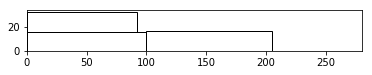

In [30]:

X = []
Y = []
li = []
wi = []
N = len(brake_boats)
for x in brake_boats:
    v=x
    print(v)
    li.append(v[1][0])
    wi.append(v[1][1])
    X.append(v[0][0])
    Y.append(v[0][1])
print('gogo')
plot_example(np.array(X), np.array(Y), np.array(li), np.array(wi), N)

In [112]:
def constrains_me(x,y,z):
    x=x.numpy()
    y=y.numpy()
    z=z.numpy()
    
    print('x',x)
    print('y',y)
    print('z',z)
    res_batch=[]
    states_flag=[]
    detail_states=[]
    available_queue_new=[]
    for e_next_node,e_available_queue,e_brake_boat in zip(x,y,z):
        e_available_queue,e_brake_boat=e_available_queue.tolist(),e_brake_boat.tolist()
        print('e_next_node={},e_available_queue={},e_brake_boat={}'.format(e_next_node,e_available_queue,e_brake_boat))
#         ava_L=30,ava_W=8
        res=quick_sort_brake_new(each_boat=e_next_node,available_queue=e_available_queue,
                                 brake_boat=e_brake_boat,L=264,W=32.8,ava_L=50,ava_W=16)
        print('res',res)
#         print('res2',res[2])
        #         res_batch.append(res)
        states_flag.append(res[0])
        detail_states.append(res[1])
        available_queue_new.append(res[2])
#     print('res_batch',res_batch)
#     states=res_batch[:,0]
#     detail_states=res_batch[:,1]
#     for i in range(3):
#         print('i',x[i],y[i])
    print('states_flag={}'.format(states_flag))
    print('detail_states={}'.format(detail_states))
    print('available_queue_new={}'.format(available_queue_new))
    return states_flag,detail_states,tf.ragged.constant(available_queue_new).to_tensor()
#真实情况，一个batch可能有140艘船，每个船有自己的长宽，batch大小可取32,64等等

In [113]:

next_node=tf.cast(next_node,tf.float32)

#一个batch=3的可排点队列初始化全为（0,0）,以及闸室状态
available_queue=[
    [[0,0]],[[0,0]],[[0,0]]
]
brake_boat=[[],[],[]]

y1,y2,y3 = tf.py_function(func=constrains_me, inp=[next_node, available_queue,brake_boat], Tout=[tf.float32,tf.float32,tf.float32])
# y= tf.numpy_function(func=constrains_me, inp=[next_node, available_queue,brake_boat], Tout=[tf.float32,tf.float32,tf.float32])
# print(y)
# y1,y2,y3 

print(y1)  
print(y2)
print(y3)

x [[100.    16.  ]
 [108.    17.25]
 [104.98  16.23]]
y [[[0 0]]

 [[0 0]]

 [[0 0]]]
z []
e_next_node=[100.  16.],e_available_queue=[[0, 0]],e_brake_boat=[]
availabel_point [0, 0]
res (True, [[0, 0, 100.0, 16.0]], [[0, 16.0], [100.0, 0]])
e_next_node=[108.    17.25],e_available_queue=[[0, 0]],e_brake_boat=[]
availabel_point [0, 0]
res (True, [[0, 0, 108.0, 17.25]], [[108.0, 0]])
e_next_node=[104.98  16.23],e_available_queue=[[0, 0]],e_brake_boat=[]
availabel_point [0, 0]
res (True, [[0, 0, 104.98, 16.23]], [[0, 16.229999542236328], [104.9800033569336, 0]])
states_flag=[True, True, True]
detail_states=[[[0, 0, 100.0, 16.0]], [[0, 0, 108.0, 17.25]], [[0, 0, 104.98, 16.23]]]
available_queue_new=[[[0, 16.0], [100.0, 0]], [[108.0, 0]], [[0, 16.229999542236328], [104.9800033569336, 0]]]
tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[[[  0.     0.   100.    16.  ]]

 [[  0.     0.   108.    17.25]]

 [[  0.     0.   104.98  16.23]]], shape=(3, 1, 4), dtype=float32)
tf.Tensor(
[

In [ ]:
len(y)

In [ ]:
wait_list.shape

In [ ]:

#一个batch=3的可排点队列初始化全为（0,0）,以及闸室状态
available_queue=[
    [[0,0]],[[0,0]],[[0,0]]
]
brake_boat=[[],[],[]]
for  i  in  range(5)
    next_node=wait_list[:,i,:]
#     #一个batch=3的可排点队列初始化全为（0,0）,以及闸室状态
#     available_queue=[[(0,0)],[(0,0)],[(0,0)]]
#     brake_boat=[[],[],[]]
    y1,y2 = tf.py_function(func=constrains_me, inp=[next_node, available_queue,brake_boat], Tout=[tf.float32,tf.float32])
    
    
    
    

In [ ]:
aa=[(True, [[(0, 0), (100.0, 16.0)]]), (True, [[(0, 0), (108.0, 17.25)]]), (True, [[(0, 0), (104.98, 16.23)]])]

In [ ]:

res=quick_sort_brake(each_boat=[100. , 16.],available_queue=[[0, 0]],brake_boat=[],L=264,W=32.8)

In [ ]:
res

In [ ]:
each_boat=[86.8 ,  16.2 ]
available_queue=[(0,0)]
brake_boat=[]
W = 32.8
L = 264
res=quick_sort_brake(each_boat,available_queue,brake_boat,L,W)

In [ ]:
res

In [ ]:
for e1,e2,e3 in zip(next_node,available_queue,brake_boat):
    print('e1={},e2={},e3={}'.format(e1,e2,e3))

In [103]:
rt = tf.ragged.constant([
                         [[3, 1, 4, 1], [], [5, 9, 2]],
                         [],
                         [[6], []]
                        ])
print(rt.shape)
print(rt)
print(rt.flat_values)

(3, None, None)
<tf.RaggedTensor [[[3, 1, 4, 1], [], [5, 9, 2]], [], [[6], []]]>
tf.Tensor([3 1 4 1 5 9 2 6], shape=(8,), dtype=int32)


In [108]:
rt_dense=rt.to_tensor()

In [109]:
rt_dense

<tf.Tensor: shape=(3, 3, 4), dtype=int32, numpy=
array([[[3, 1, 4, 1],
        [0, 0, 0, 0],
        [5, 9, 2, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[6, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])>

In [114]:
rt_dense.to_sparse()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'to_sparse'

In [110]:
rt

<tf.RaggedTensor [[[3, 1, 4, 1], [], [5, 9, 2]], [], [[6], []]]>

In [111]:
rt.shape

TensorShape([3, None, None])

In [104]:
dir(rt)

['__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_as_graph_element',
 '_consumers',
 '_convert_values_and_partition',
 '_eager_value',
 '_from_row_partition',
 '_from_variant',
 '_is_eager'

In [ ]:
available_point

In [ ]:
mask_available_point=tf.cast(tf.ones((3,5,2)),tf.bool)


In [ ]:
mask_available_point=tf.concat([tf.cast(tf.zeros((3,1,2)),tf.bool),mask_available_point],axis=1)

In [ ]:
def pp(x):
    tf.print(x)
    tf.print('***')
    x=x+1
    return x


In [ ]:
tf.map_fn(fn=lambda x:pp(x), elems=(available_point,wait_list))

In [ ]:
tf.map_fn(fn=lambda x:x+1, elems=tf.constant([[3, 5, 2],[3, 5, 2],[3, 5, 2]]))

In [ ]:
tf.map_fn(fn=lambda x:x+1, elems=available_point)

In [ ]:
mask_available_point

In [ ]:
mask_available_point[:,0]=[ True,  True]#=False#tf.cast(tf.zeros((3,2)),tf.bool)

In [ ]:
available_point

In [ ]:
brake_state

In [ ]:
brake_state= tf.TensorArray(dtype = tf.float32, size = 0, dynamic_size = True, element_shape = (3,))

In [ ]:
available_point_array= tf.TensorArray(dtype = tf.float32, size = 0, dynamic_size = True, element_shape = (3,None,2))

In [ ]:
available_point_array.write(0,tf.zeros((3,1,2)))
# available_point_array.write(1,tf.zeros((3,2,2)))

In [ ]:
available_point_array.read(0)

In [ ]:
brake_state.write(0,[2,3,1])

In [ ]:
brake_state.read(0)

In [ ]:
wait_list

In [ ]:
RawResult = collections.namedtuple('RawResult',
                                   ['available_point', 'brake_state'])


In [ ]:
res=RawResult(available_point=[0,0],brake_state=[1,1])

In [ ]:
res

In [ ]:
res.available_point

In [ ]:
res.brake_state

In [ ]:
# (xi+li<=L) and (yi+wi)<=W:#能否放下
# (xi+li<=xj) or (xj+lj<=xi) or (yi+wi<=yj) or (yj+wj<=yi):是否重叠

In [ ]:
#假设该batch是刚开始，对于每一个闸次初始化时可排点是一样的，随着动态变化，可排点不断变化
#闸室中对应着两个队列，可排点队列和已排的船队列（位置坐标和长宽）
#对应当前batch，中每一个序列，都要维护两个东西：当前闸室可排点状态，当前闸室已排船只状态
# available_queue = [(0, 0)]

In [ ]:
W = 34
L = 280
xi=0
yi=0

In [ ]:
#切片维度不变
wait_list[:,:,:1]

In [ ]:
#索引会减少维度
wait_list[:,:,0]

In [ ]:
#判断能否放得下：
#对于某艘船要判断，所有的可排点能否放下该船，放不下直接False
#假设能放下该船，要判断该船与闸室中所有的船是否为重叠 ,有重叠直接False


tf.cast((wait_list[:,:,0]+xi<=L), tf.bool)& tf.cast((wait_list[:,:,1]+yi),tf.bool)

In [ ]:
#假设放得下之后，就要判断新放下的船与闸室中已有的船是否会重叠

#D:(batch,1)batch中每一个都有一个剩余容量，这里对应闸室状态

In [ ]:
b=tf.random.uniform((5,2),50,100,dtype=tf.float64)

In [ ]:
b

In [ ]:
wait_list

In [ ]:
wait_list<b

In [ ]:
tf.constant([2,3])<tf.constant([2,1])

In [ ]:
tf.math.greater(wait_list,b)

In [ ]:
tf.equal(wait_list,b)

In [ ]:
a=np.zeros((1,4))

In [ ]:
a

In [ ]:
tf.broadcast_to(a,[4,2,2,4])

In [ ]:
aa=tf.constant([0,10,3])

In [ ]:
bb=tf.constant([10,0,3])

In [ ]:
aa|bb

In [ ]:
aa&bb

In [ ]:
tf.cast(aa^bb,tf.bool)

In [ ]:
import tensorflow as tf
 
def log_huber(x, m):
    '''
    因为是tensorflow2.1,所以默认使用的是EagerTensor，我们可以在里面直接使用python的条件判断，而不用使用
    tf.while_loop、tf.cond等条件判断
    '''
    if tf.abs(x) <= m:
        return x**2  # 无论这里返回什么，总是会被包装成默认的与之匹配的Tensor返回，这是自动实现的
    else:
        return m**2 * (1 - 2 * tf.math.log(m) + tf.math.log(x**2))
 
x = tf.Variable(initial_value = 1.5)
m = tf.Variable(initial_value = 2.0)
 
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = tf.py_function(func=log_huber, inp=[x, m], Tout=tf.float32)
    print(y)  # 应该是1.5**2 = 2.25
    dy_dx = g.gradient(y, x)     # y对x求导，应该是2x，即3.0
    print(dy_dx)

In [ ]:
def add_sub(x, y):
    '''
    在此函数中使用纯python编程方式
    '''
    tf.print('x',x)
    tf.print('y',y)
    x_ = x.numpy()
    y_ = y.numpy()
    result1 = x_ + y_ - (x_ - y_)
    result2 = x_ + y_ + (x_ - y_)  
    # 返回的就是普通的python对象，但是它会自动转化成tensor来作为最终的结果，是自动完成的
    return result1,result2
 
x = tf.Variable(initial_value = [10,20,30])
y = tf.Variable(initial_value = [100,200,300])
 
y1,y2 = tf.py_function(func=add_sub, inp=[x, y], Tout=[tf.int32,tf.int32])
print(y1)  
print(y2)  
'''
tf.Tensor([200 400 600], shape=(3,), dtype=int32)
tf.Tensor([20 40 60], shape=(3,), dtype=int32)
'''

In [ ]:
x[0]

In [ ]:
# wait_list

In [ ]:
a= tf.TensorArray(tf.float32, size=0, dynamic_size=True)
a = a.write(0, [0, 0]) # 这里的write需要赋值给对方.
a = a.write(1, [1, 1])
a = a.write(2, [2, 2])


# read_value1 = a.read(0) # 读取某个索引下的值.
a = a.write(0, [11, 11])
# read_value2 = a.read(0) # 读取某个索引下的值.

In [ ]:
read_value1

In [ ]:
read_value2

In [ ]:
a.stack()

In [ ]:
#读一次就把相应的值读出来， 置为0
read_value1 = a.read(0) # 读取某个索引下的值.

In [ ]:
a.stack()

In [ ]:
read_value1 = a.read(1) # 读取某个索引下的值.
read_value1

In [ ]:
a.stack()

In [ ]:
read_value1 = a.read(2) # 读取某个索引下的值.
read_value1

In [ ]:
a.stack()